# Multi-class Classification:Data Science in Hospitality Management
## Problem Statement:

You are provided with a comprehensive dataset from a hotel booking system. The dataset includes various features such as the number of adults and children, duration of stay (split between weekend and weeknights), meal plan preference, requirement for parking space, lead time, arrival dates (year, month, date), market segment, guest history (repeated guest, number of previous cancellations, and number of previous bookings not canceled), average price per room, number of special requests, and booking status. The objective is to develop a predictive model that can accurately forecast the type of room a guest is likely to reserve (room_type_reserved). Successfully predicting the room_type_reserved will empower hotels to optimize room inventory management, tailor marketing strategies, enhance guest experiences through personalized services, improve revenue management through dynamic pricing, and boost operational efficiency by anticipating demand for various room types.

## Aim:
* To perform multi-class classification on room types that customer will likely to reserve

## Dataset Attributes
The dataset provided from a hotel booking system and contains various features that describe the booking details and customer preferences. Here is a brief overview of the dataset columns: 
* no_of_adults: The number of adults included in the booking.
* no_of_children: The number of children included in the booking.
* no_of_weekend_nights: The number of weekend nights booked.
* no_of_week_nights: The number of weeknights booked.
* type_of_meal_plan: The type of meal plan selected by the guest.
* required_car_parking_space: Indicates whether the guest required a car parking space.
* room_type_reserved: The type of room reserved by the guest.
* lead_time: The number of days between the booking date and the arrival date.
* arrival_year: The year of arrival.
* arrival_month: The month of arrival.
* arrival_date: The date of arrival.
* market_segment_type: The market segment from which the booking originated.
* repeated_guest: Indicates whether the guest has previously stayed at the hotel.
* no_of_previous_cancellations: The number of previous bookings that were canceled by the guest.
* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the guest.
* avg_price_per_room: The average price per room for the booking.
* no_of_special_requests: The number of special requests made by the guest.
* booking_status: Indicates whether the booking was canceled or not.

# Load dataset

In [12]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

df=pd.read_csv('train_problem3.csv')
test=pd.read_csv('test_new_problem3.csv')

In [13]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Offline,0,0,0,61.00,0,Canceled
1,2,0,0,1,Meal Plan 1,0,Room_Type 1,15,2018,12,27,Offline,0,0,0,65.00,0,Not_Canceled
2,1,0,2,2,Meal Plan 1,0,Room_Type 5,44,2018,5,27,Corporate,0,0,0,135.40,0,Canceled
3,2,0,1,3,Meal Plan 1,0,Room_Type 1,250,2018,9,26,Online,0,0,0,95.00,0,Canceled
4,3,0,2,3,Meal Plan 1,0,Room_Type 4,48,2018,7,2,Online,0,0,0,157.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,2,0,1,1,Meal Plan 1,0,Room_Type 1,159,2018,4,9,Offline,0,0,0,70.00,1,Not_Canceled
32637,2,1,0,4,Meal Plan 2,0,Room_Type 1,12,2018,2,24,Online,0,0,0,158.50,3,Not_Canceled
32638,2,0,0,4,Meal Plan 1,0,Room_Type 4,189,2018,8,16,Online,0,0,0,112.20,2,Canceled
32639,2,0,2,3,Meal Plan 1,0,Room_Type 1,28,2018,5,21,Online,0,0,0,117.74,0,Canceled


In [14]:
test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,Meal Plan 1,0,85,2018,10,6,Offline,0,0,0,85.00,1,Not_Canceled
1,4,0,2,1,Meal Plan 1,0,21,2018,7,17,Online,0,0,0,299.33,0,Canceled
2,2,0,1,1,Meal Plan 1,0,38,2018,12,5,Complementary,0,0,0,0.00,1,Not_Canceled
3,1,0,2,4,Meal Plan 1,0,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
4,1,0,0,1,Meal Plan 1,0,25,2018,12,27,Offline,0,0,0,60.00,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,2,2,0,4,Meal Plan 1,0,20,2018,6,8,Online,0,0,0,211.00,2,Not_Canceled
3623,1,0,0,2,Meal Plan 1,0,103,2018,4,19,Offline,0,0,0,115.00,0,Canceled
3624,2,0,0,2,Meal Plan 1,0,10,2018,3,18,Online,0,0,0,118.00,0,Canceled
3625,1,0,0,2,Meal Plan 1,0,25,2017,11,17,Online,0,0,0,101.00,1,Not_Canceled


# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## Question 1 : Data Analysis (10 pt)
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641 entries, 0 to 32640
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          32641 non-null  int64  
 1   no_of_children                        32641 non-null  int64  
 2   no_of_weekend_nights                  32641 non-null  int64  
 3   no_of_week_nights                     32641 non-null  int64  
 4   type_of_meal_plan                     32641 non-null  object 
 5   required_car_parking_space            32641 non-null  int64  
 6   room_type_reserved                    32641 non-null  object 
 7   lead_time                             32641 non-null  int64  
 8   arrival_year                          32641 non-null  int64  
 9   arrival_month                         32641 non-null  int64  
 10  arrival_date                          32641 non-null  int64  
 11  market_segment_

In [16]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Offline,0,0,0,61.00,0,Canceled
1,2,0,0,1,Meal Plan 1,0,Room_Type 1,15,2018,12,27,Offline,0,0,0,65.00,0,Not_Canceled
2,1,0,2,2,Meal Plan 1,0,Room_Type 5,44,2018,5,27,Corporate,0,0,0,135.40,0,Canceled
3,2,0,1,3,Meal Plan 1,0,Room_Type 1,250,2018,9,26,Online,0,0,0,95.00,0,Canceled
4,3,0,2,3,Meal Plan 1,0,Room_Type 4,48,2018,7,2,Online,0,0,0,157.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,2,0,1,1,Meal Plan 1,0,Room_Type 1,159,2018,4,9,Offline,0,0,0,70.00,1,Not_Canceled
32637,2,1,0,4,Meal Plan 2,0,Room_Type 1,12,2018,2,24,Online,0,0,0,158.50,3,Not_Canceled
32638,2,0,0,4,Meal Plan 1,0,Room_Type 4,189,2018,8,16,Online,0,0,0,112.20,2,Canceled
32639,2,0,2,3,Meal Plan 1,0,Room_Type 1,28,2018,5,21,Online,0,0,0,117.74,0,Canceled


In [72]:
test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,Meal Plan 1,0,85,2018,10,6,Offline,0,0,0,85.00,1,Not_Canceled
1,4,0,2,1,Meal Plan 1,0,21,2018,7,17,Online,0,0,0,299.33,0,Canceled
2,2,0,1,1,Meal Plan 1,0,38,2018,12,5,Complementary,0,0,0,0.00,1,Not_Canceled
3,1,0,2,4,Meal Plan 1,0,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
4,1,0,0,1,Meal Plan 1,0,25,2018,12,27,Offline,0,0,0,60.00,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,2,2,0,4,Meal Plan 1,0,20,2018,6,8,Online,0,0,0,211.00,2,Not_Canceled
3623,1,0,0,2,Meal Plan 1,0,103,2018,4,19,Offline,0,0,0,115.00,0,Canceled
3624,2,0,0,2,Meal Plan 1,0,10,2018,3,18,Online,0,0,0,118.00,0,Canceled
3625,1,0,0,2,Meal Plan 1,0,25,2017,11,17,Online,0,0,0,101.00,1,Not_Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641 entries, 0 to 32640
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          32641 non-null  int64  
 1   no_of_children                        32641 non-null  int64  
 2   no_of_weekend_nights                  32641 non-null  int64  
 3   no_of_week_nights                     32641 non-null  int64  
 4   type_of_meal_plan                     32641 non-null  object 
 5   required_car_parking_space            32641 non-null  int64  
 6   room_type_reserved                    32641 non-null  object 
 7   lead_time                             32641 non-null  int64  
 8   arrival_year                          32641 non-null  int64  
 9   arrival_month                         32641 non-null  int64  
 10  arrival_date                          32641 non-null  int64  
 11  market_segment_

In [19]:
# What attributes/features are continuous valued?
continuous_attributes = df.select_dtypes(include=['number']).columns.tolist()
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()

# Print the result
print("Continuous attributes:", continuous_attributes)
print("Categorical attributes:", categorical_attributes)

Continuous attributes: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical attributes: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [20]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'no_of_adults': [1 2 3 0 4]
Unique values in column 'no_of_children': [ 0  1  2  3  9 10]
Unique values in column 'no_of_weekend_nights': [2 0 1 4 3 6 5 7]
Unique values in column 'no_of_week_nights': [ 1  2  3 12  0  4  6  5 16  7 15  9 10  8 11 13 14 17]
Unique values in column 'type_of_meal_plan': ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Unique values in column 'required_car_parking_space': [0 1]
Unique values in column 'room_type_reserved': ['Room_Type 1' 'Room_Type 5' 'Room_Type 4' 'Room_Type 6' 'Room_Type 2'
 'Room_Type 7']
Unique values in column 'lead_time': [116  15  44 250  48  23  46   9  39  34 189 102  37  74  24 137 286  77
  20   0  16 161   4  26   6 314  12 176   3  93  45 151  32   8  49  86
 129 224  10 118  40  84  60 110   1  28 125  59 103  21  67 377 105  35
 113  65  33  75   2  14 121  13 182  54  72  30  71  56 148 279 228  81
 159  18 124 122   5 240 136 272  27  17 115 304  79  25  47 191  11  80
  63 305  52 193 126

In [21]:
# Display the statistical values for each of the attributes, of the distributions for each attribute. 
statistical_values = df.describe()
statistical_values

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000
mean,1.846941,0.105205,0.810913,2.204528,0.031065,85.212830,2017.819858,7.429245,15.623909,0.025214,0.023529,0.153764,103.396869,0.621672
std,0.517504,0.400701,0.870699,1.408902,0.173497,85.837873,0.384311,3.067804,8.740196,0.156776,0.371302,1.759335,35.004782,0.787133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.120000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


In [22]:
# checking for null values across all columns
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [23]:
#dropping missing values
df.dropna(inplace=True)

In [24]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Offline,0,0,0,61.00,0,Canceled
1,2,0,0,1,Meal Plan 1,0,Room_Type 1,15,2018,12,27,Offline,0,0,0,65.00,0,Not_Canceled
2,1,0,2,2,Meal Plan 1,0,Room_Type 5,44,2018,5,27,Corporate,0,0,0,135.40,0,Canceled
3,2,0,1,3,Meal Plan 1,0,Room_Type 1,250,2018,9,26,Online,0,0,0,95.00,0,Canceled
4,3,0,2,3,Meal Plan 1,0,Room_Type 4,48,2018,7,2,Online,0,0,0,157.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,2,0,1,1,Meal Plan 1,0,Room_Type 1,159,2018,4,9,Offline,0,0,0,70.00,1,Not_Canceled
32637,2,1,0,4,Meal Plan 2,0,Room_Type 1,12,2018,2,24,Online,0,0,0,158.50,3,Not_Canceled
32638,2,0,0,4,Meal Plan 1,0,Room_Type 4,189,2018,8,16,Online,0,0,0,112.20,2,Canceled
32639,2,0,2,3,Meal Plan 1,0,Room_Type 1,28,2018,5,21,Online,0,0,0,117.74,0,Canceled


### Next, let's create visualizations to explore the data

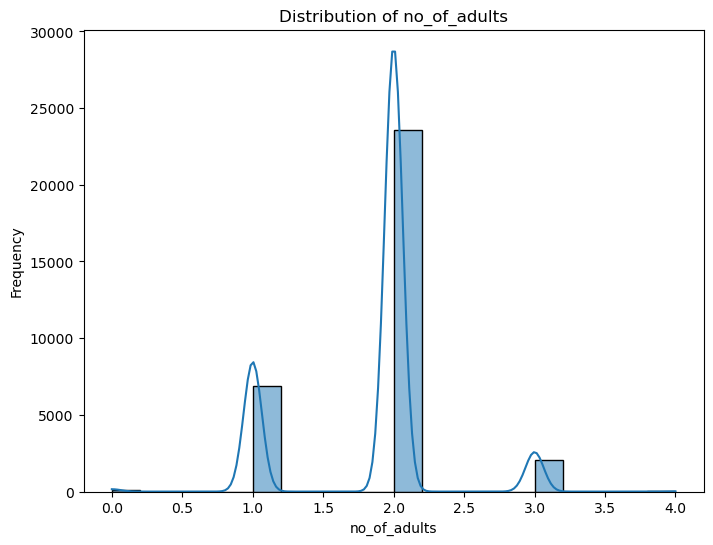

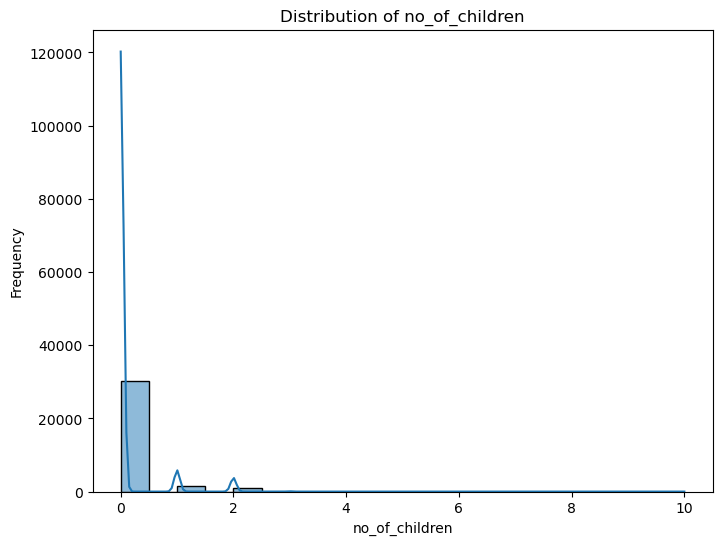

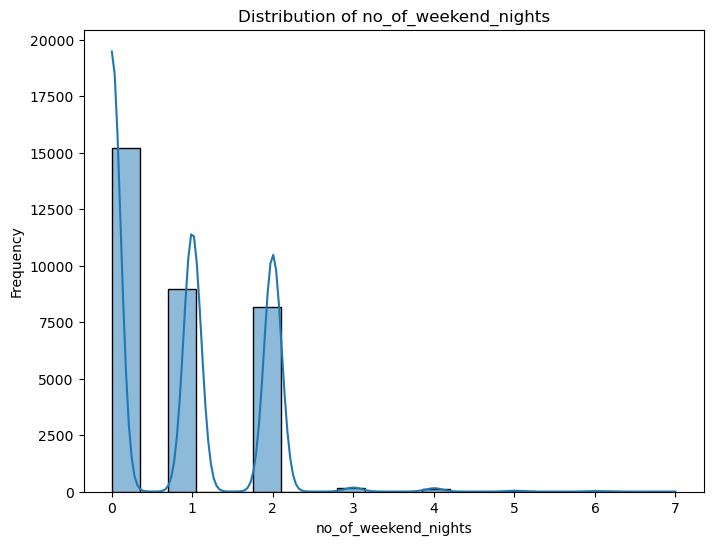

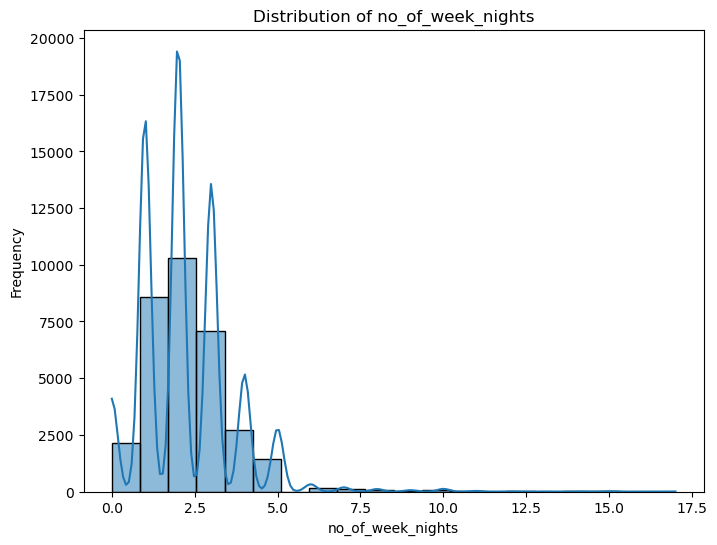

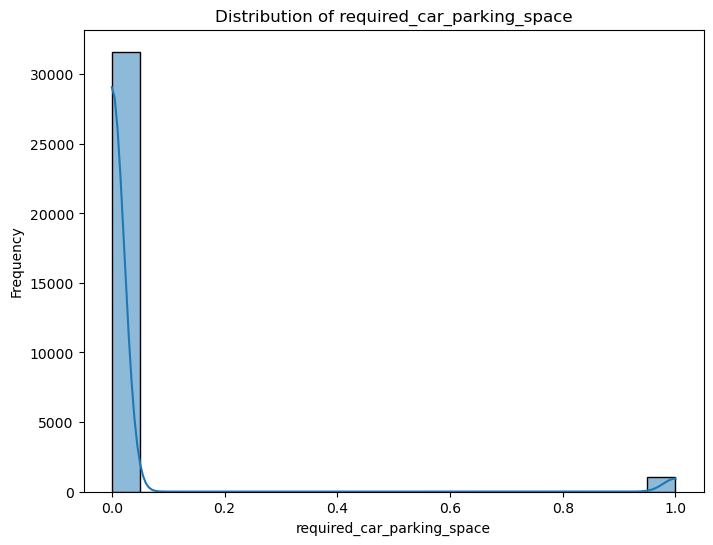

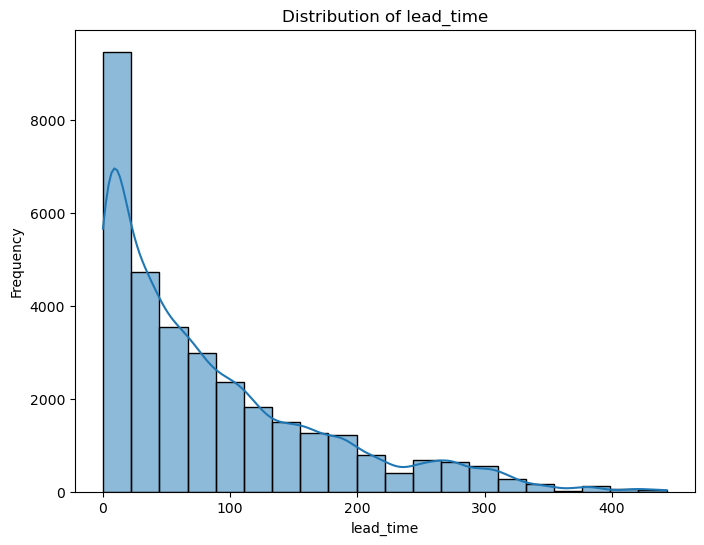

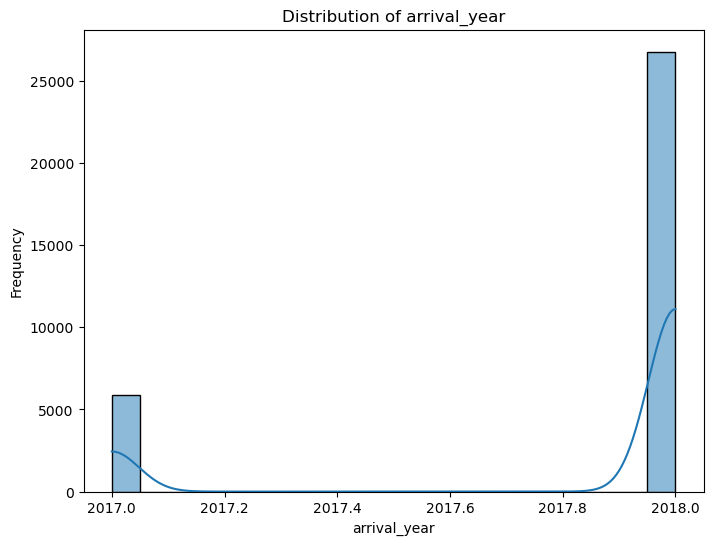

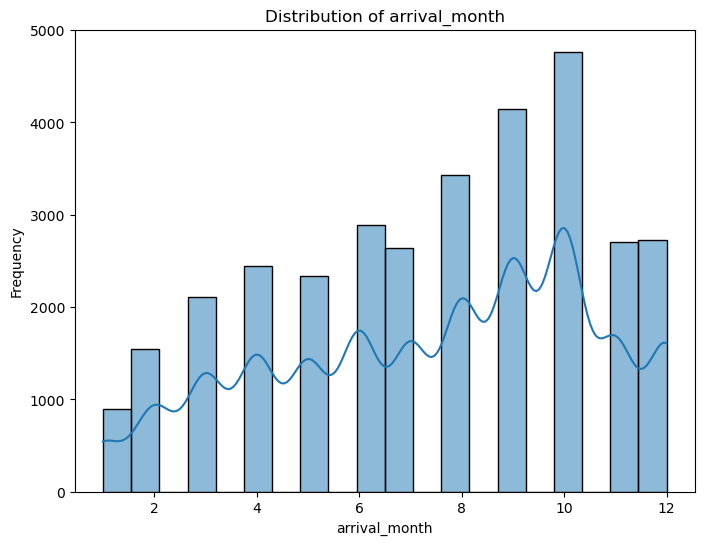

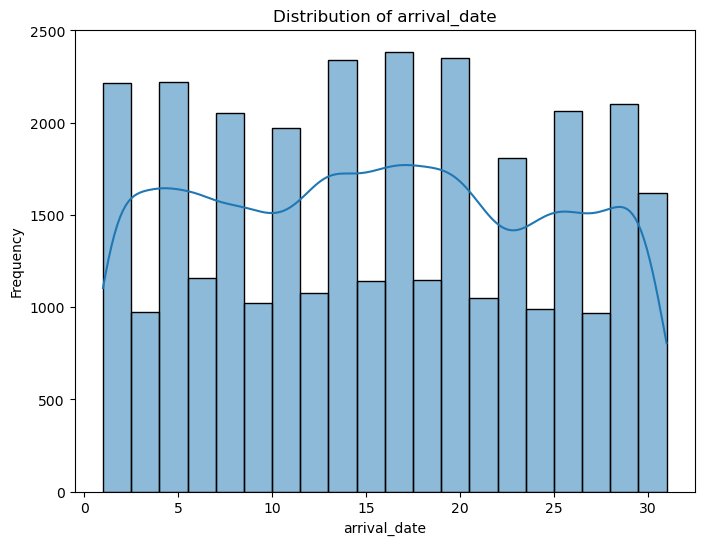

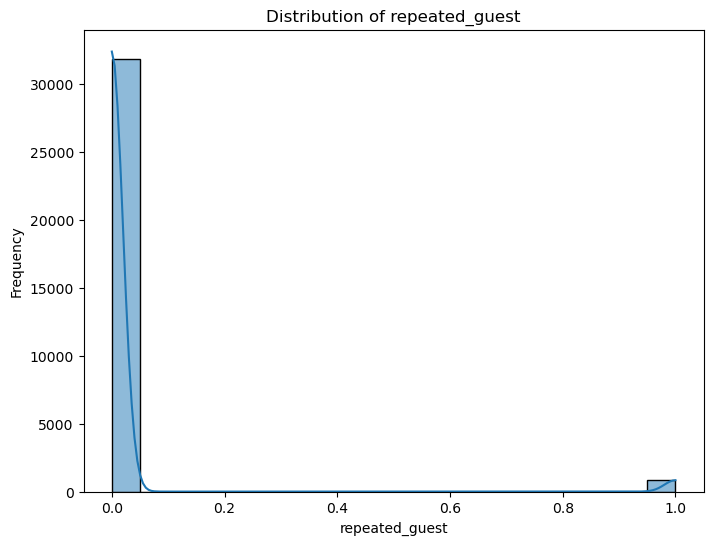

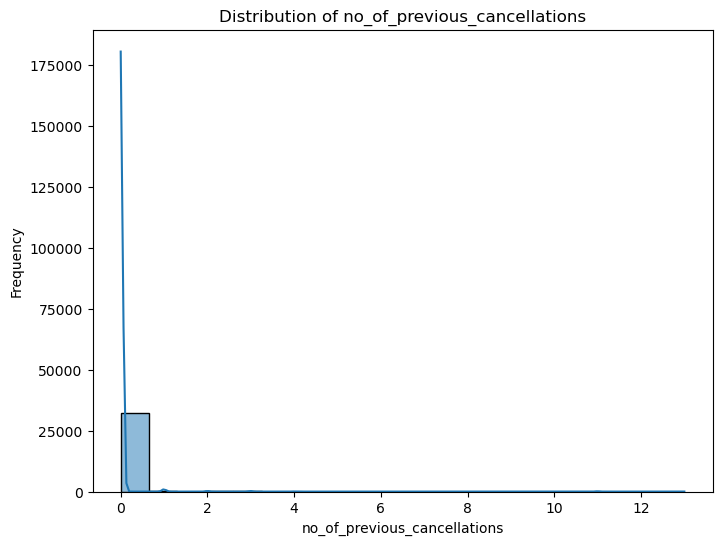

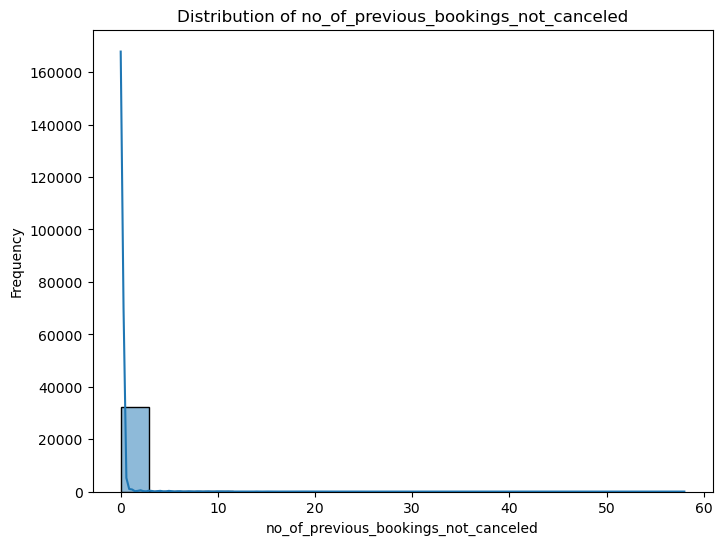

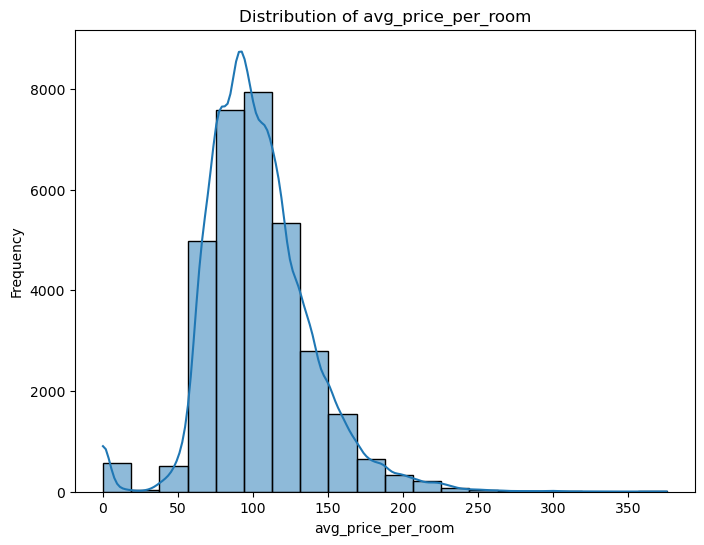

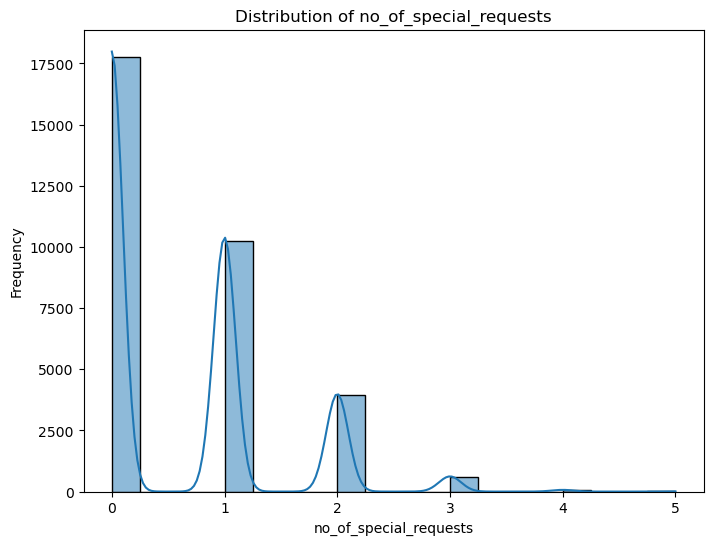

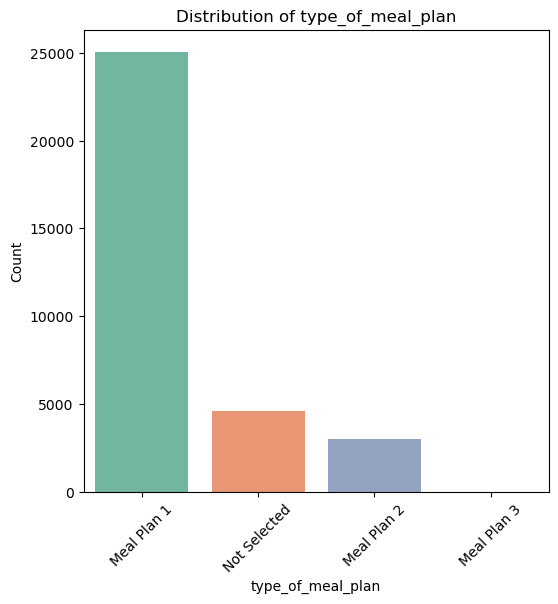

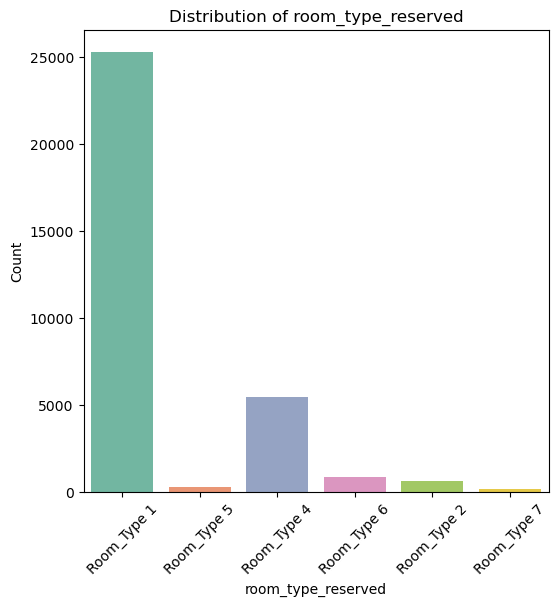

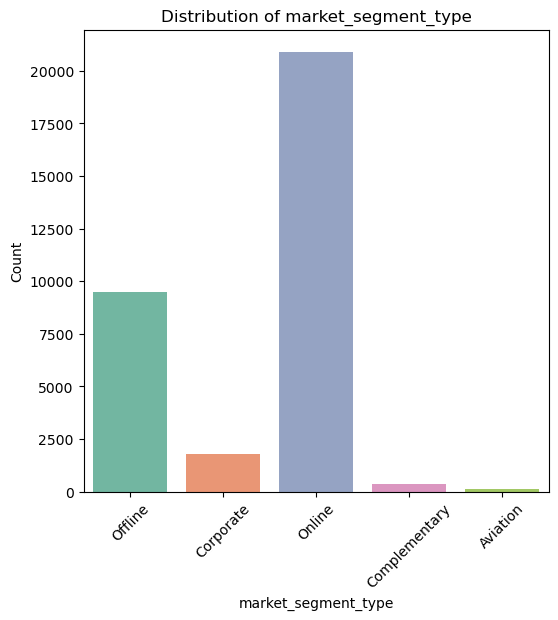

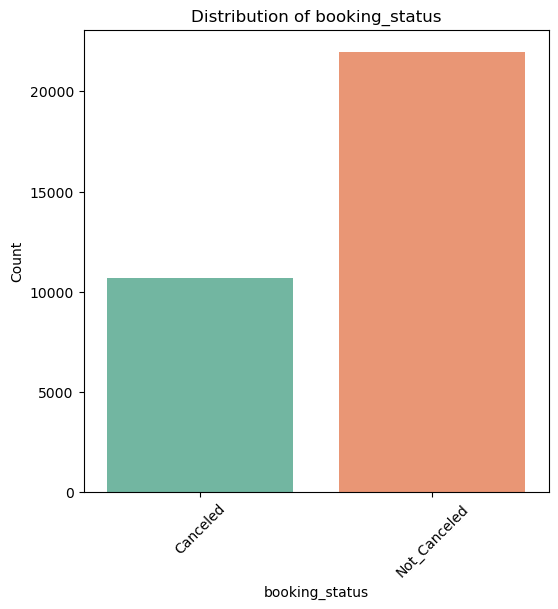

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_attribute_distribution(df):
    # Histograms for numerical attributes
    num_attributes = df.select_dtypes(include=['number']).columns
    for col in num_attributes:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Countplots for categorical attributes
    cat_attributes = df.select_dtypes(include=['object']).columns
    for col in cat_attributes:
        plt.figure(figsize=(6, 6))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
visualize_attribute_distribution(df)


### Distribution of each feature with the target

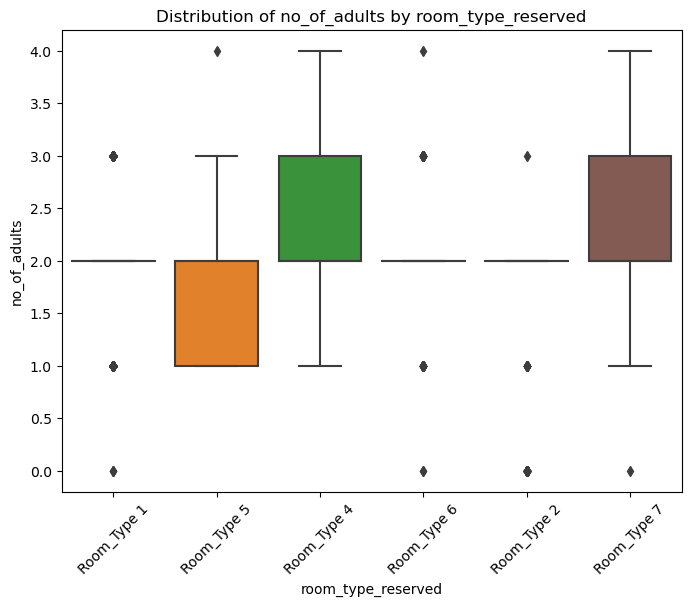

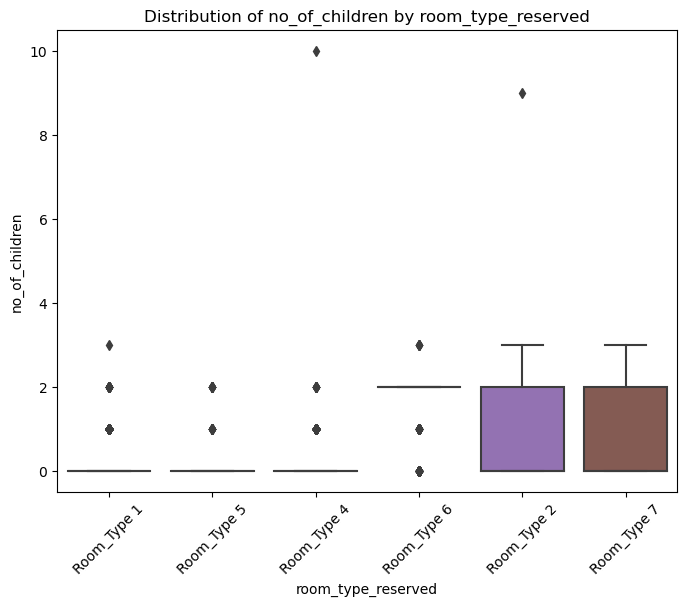

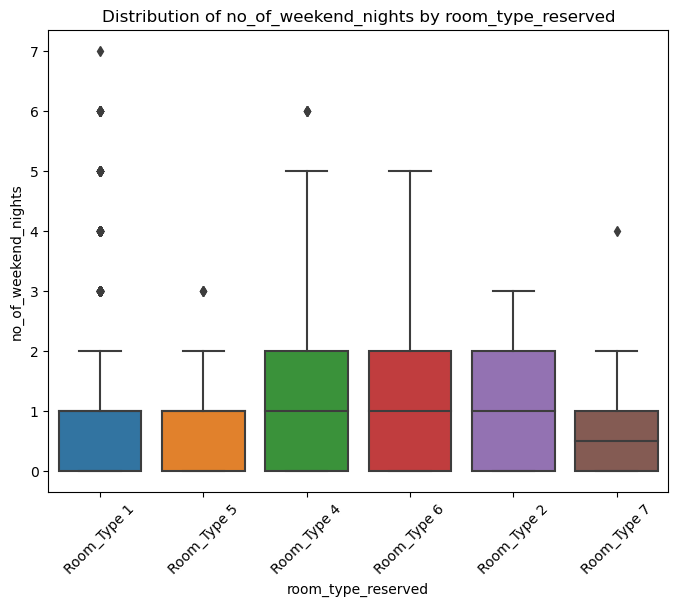

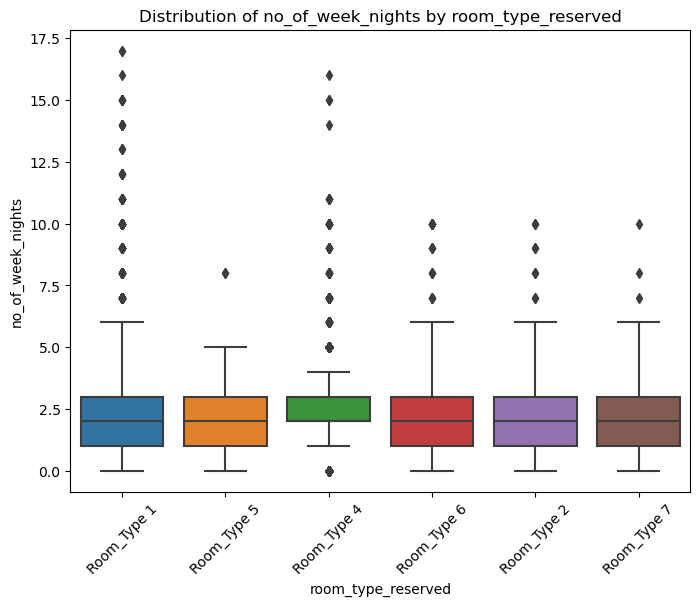

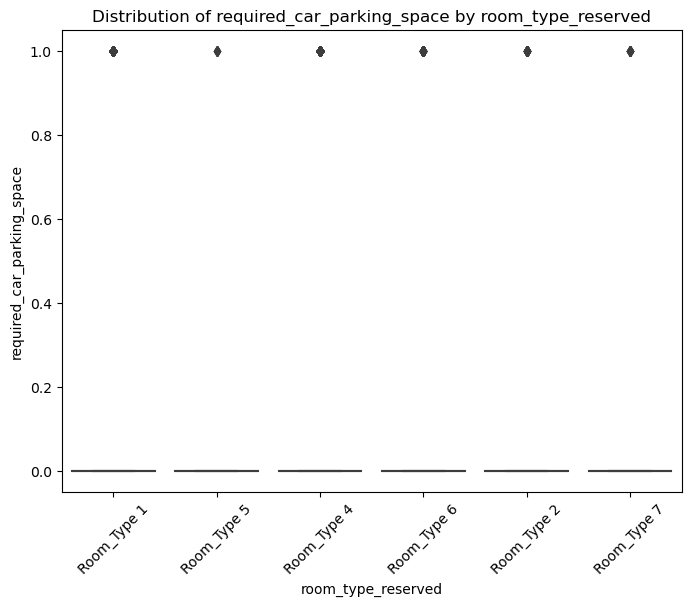

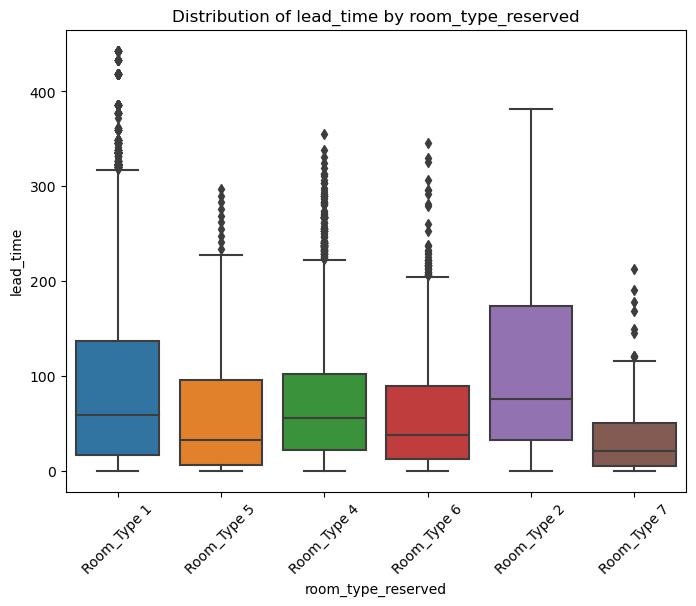

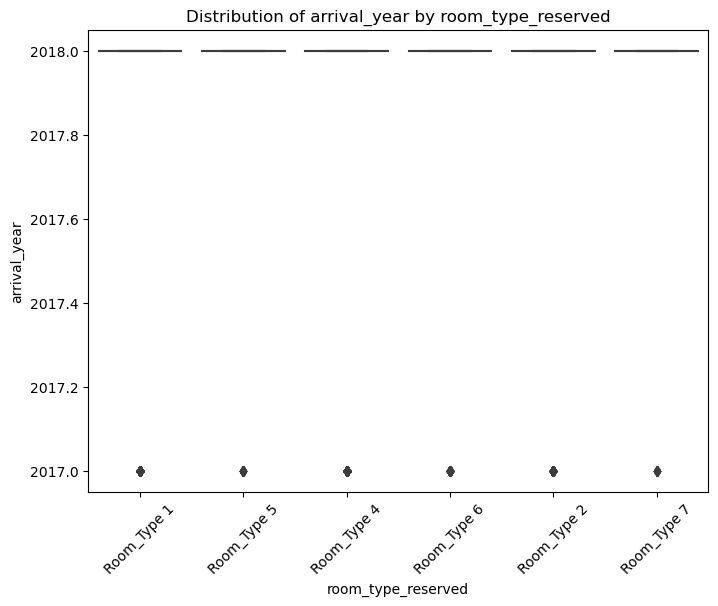

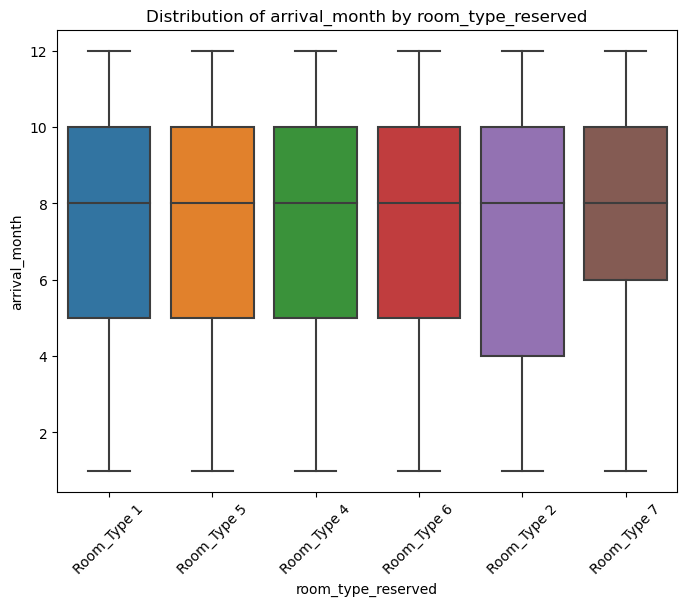

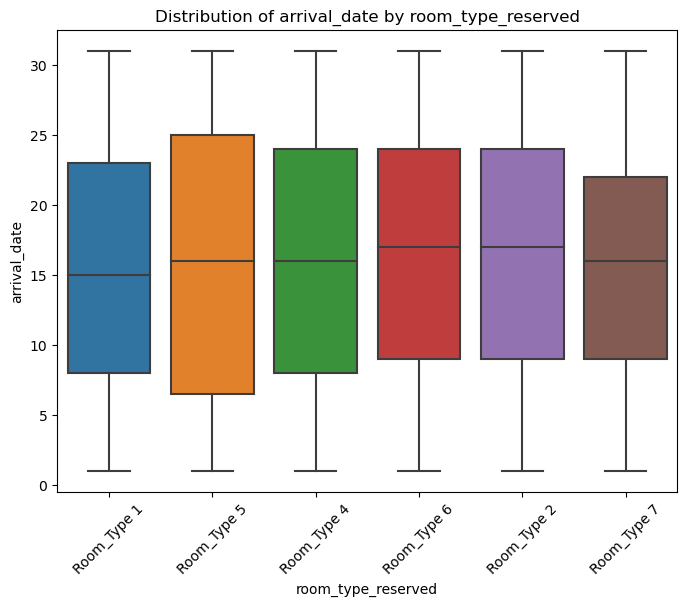

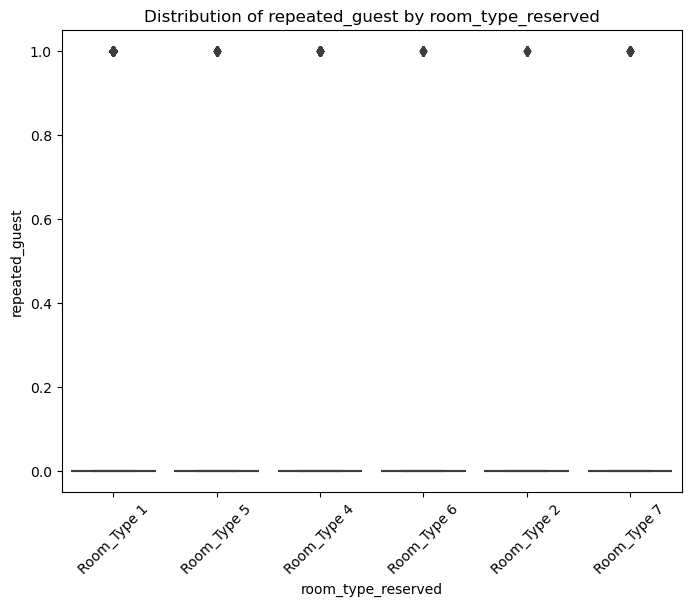

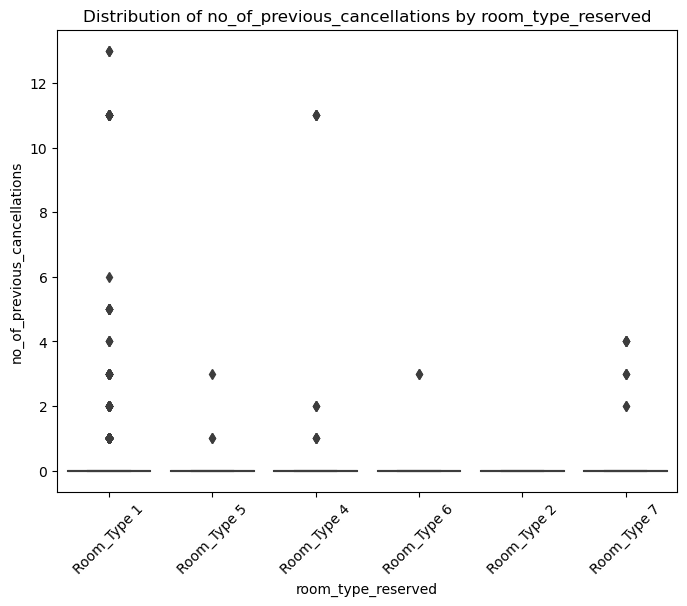

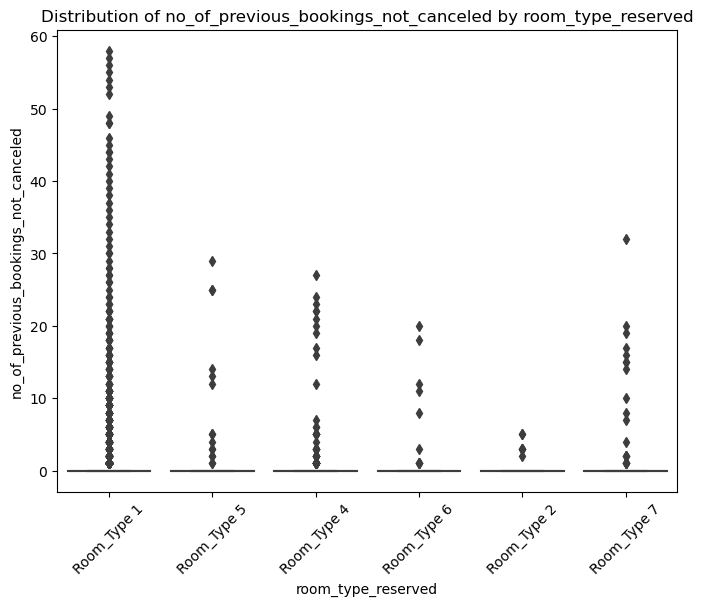

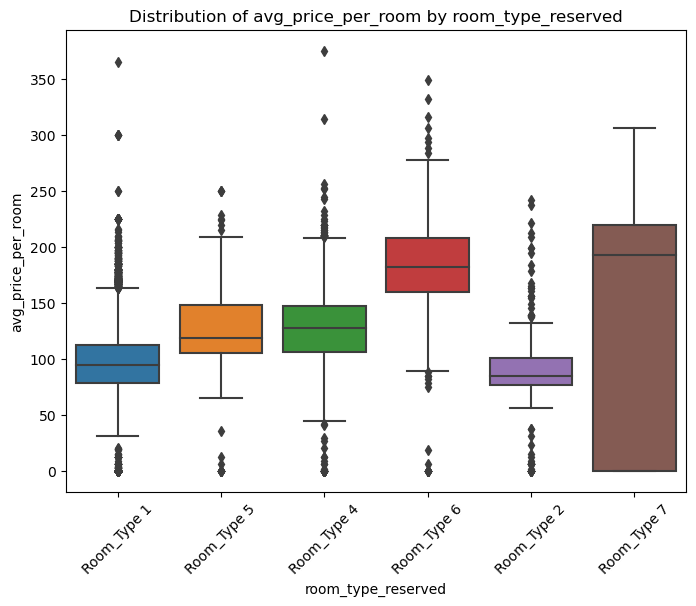

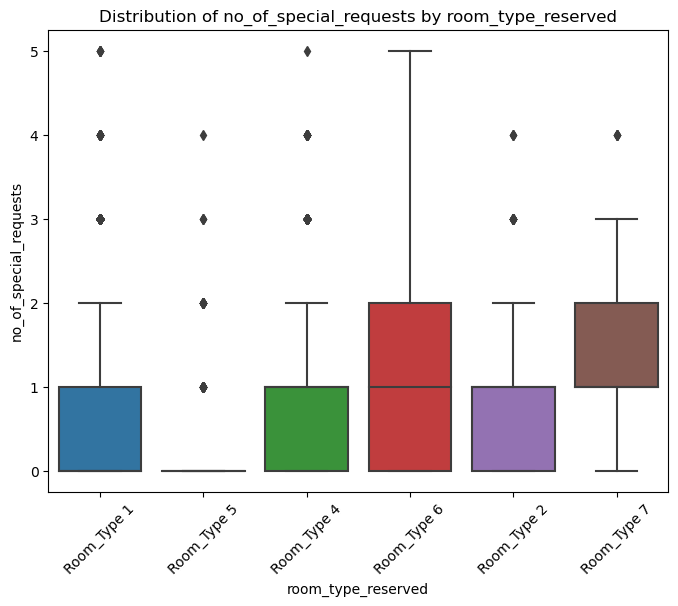

In [26]:
# distribution of each feature with the target
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_data_label_relationship(df, label_column):
    num_attributes = df.select_dtypes(include=['number']).columns
    
    if df[label_column].dtype == 'object':
        # If label column is categorical
        for col in num_attributes:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[label_column], y=df[col])
            plt.title(f'Distribution of {col} by {label_column}')
            plt.xlabel(label_column)
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.show()
            
    else:
        # If label column is numerical
        for col in num_attributes:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[col], y=df[label_column])
            plt.title(f'{col} vs {label_column}')
            plt.xlabel(col)
            plt.ylabel(label_column)
            plt.show()

# Example usage:
# Assuming 'df' is your DataFrame and 'label_column' is the name of the label column
visualize_data_label_relationship(df, 'room_type_reserved')


### Performing manual mapping for the target column

In [27]:
#performing manual mapping for the target column
mapping = {'Room_Type 1': 1, 
           'Room_Type 5': 2, 
           'Room_Type 4': 3, 
           'Room_Type 6': 4, 
           'Room_Type 2': 5,
           'Room_Type 7': 6}

# Map the values in the 'room_type_reserved' column
df['room_type_reserved'] = df['room_type_reserved'].map(mapping)

# Print the unique values in the 'room_type_reserved' column after mapping
print(df['room_type_reserved'].unique())


[1 2 3 4 5 6]


In [28]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,1,Meal Plan 1,0,1,116,2018,2,28,Offline,0,0,0,61.00,0,Canceled
1,2,0,0,1,Meal Plan 1,0,1,15,2018,12,27,Offline,0,0,0,65.00,0,Not_Canceled
2,1,0,2,2,Meal Plan 1,0,2,44,2018,5,27,Corporate,0,0,0,135.40,0,Canceled
3,2,0,1,3,Meal Plan 1,0,1,250,2018,9,26,Online,0,0,0,95.00,0,Canceled
4,3,0,2,3,Meal Plan 1,0,3,48,2018,7,2,Online,0,0,0,157.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,2,0,1,1,Meal Plan 1,0,1,159,2018,4,9,Offline,0,0,0,70.00,1,Not_Canceled
32637,2,1,0,4,Meal Plan 2,0,1,12,2018,2,24,Online,0,0,0,158.50,3,Not_Canceled
32638,2,0,0,4,Meal Plan 1,0,3,189,2018,8,16,Online,0,0,0,112.20,2,Canceled
32639,2,0,2,3,Meal Plan 1,0,1,28,2018,5,21,Online,0,0,0,117.74,0,Canceled


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641 entries, 0 to 32640
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          32641 non-null  int64  
 1   no_of_children                        32641 non-null  int64  
 2   no_of_weekend_nights                  32641 non-null  int64  
 3   no_of_week_nights                     32641 non-null  int64  
 4   type_of_meal_plan                     32641 non-null  object 
 5   required_car_parking_space            32641 non-null  int64  
 6   room_type_reserved                    32641 non-null  int64  
 7   lead_time                             32641 non-null  int64  
 8   arrival_year                          32641 non-null  int64  
 9   arrival_month                         32641 non-null  int64  
 10  arrival_date                          32641 non-null  int64  
 11  market_segment_

### Executing Label encoding on the rest of the categorical features

In [30]:
#label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641 entries, 0 to 32640
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          32641 non-null  int64  
 1   no_of_children                        32641 non-null  int64  
 2   no_of_weekend_nights                  32641 non-null  int64  
 3   no_of_week_nights                     32641 non-null  int64  
 4   type_of_meal_plan                     32641 non-null  int32  
 5   required_car_parking_space            32641 non-null  int64  
 6   room_type_reserved                    32641 non-null  int64  
 7   lead_time                             32641 non-null  int64  
 8   arrival_year                          32641 non-null  int64  
 9   arrival_month                         32641 non-null  int64  
 10  arrival_date                          32641 non-null  int64  
 11  market_segment_

In [32]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,1,0,0,1,116,2018,2,28,3,0,0,0,61.00,0,0
1,2,0,0,1,0,0,1,15,2018,12,27,3,0,0,0,65.00,0,1
2,1,0,2,2,0,0,2,44,2018,5,27,2,0,0,0,135.40,0,0
3,2,0,1,3,0,0,1,250,2018,9,26,4,0,0,0,95.00,0,0
4,3,0,2,3,0,0,3,48,2018,7,2,4,0,0,0,157.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,2,0,1,1,0,0,1,159,2018,4,9,3,0,0,0,70.00,1,1
32637,2,1,0,4,1,0,1,12,2018,2,24,4,0,0,0,158.50,3,1
32638,2,0,0,4,0,0,3,189,2018,8,16,4,0,0,0,112.20,2,0
32639,2,0,2,3,0,0,1,28,2018,5,21,4,0,0,0,117.74,0,0


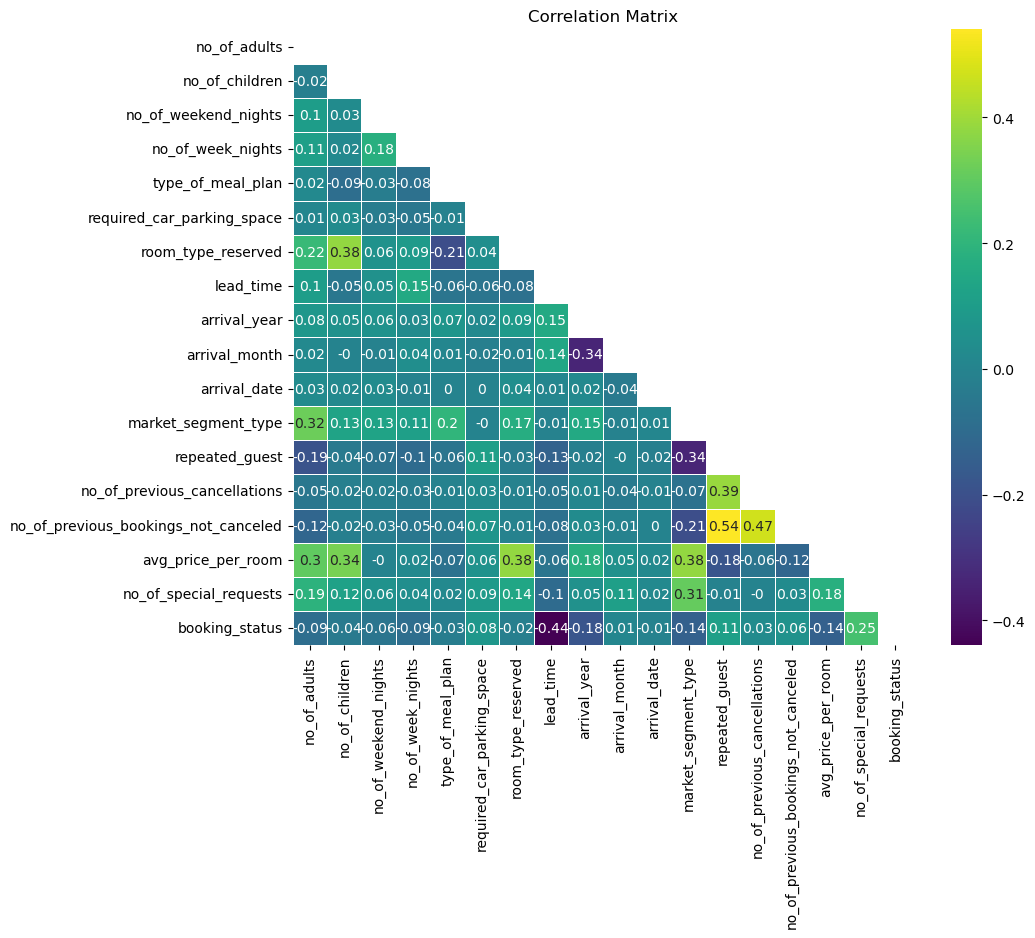

In [34]:
# finding correlation between columns
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation matrix
correlation_matrix = df.corr()

# Rounding values to two decimal places
correlation_matrix = correlation_matrix.round(2)

# Masking upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Creating a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

 no_of_previous_booking_not_canceled and repeated guests are highly correlated, no_of_previous_cancellations-no_of_previous_booking_not_canceled, market_segment_type-avg_price_per_room

## Question 2 : Data Pre-processing & Feature Engineering (20 pt)
Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary. 

Analyze the relationship between all the features. Use appropriate visualization techniques.

Perform Feature Engineering on the dataset.

**Hint**: Analyze the statistical values for every attribute and visual representations of the distributions for each attribute, such as a histogram.

In [35]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,1,0,0,1,116,2018,2,28,3,0,0,0,61.00,0,0
1,2,0,0,1,0,0,1,15,2018,12,27,3,0,0,0,65.00,0,1
2,1,0,2,2,0,0,2,44,2018,5,27,2,0,0,0,135.40,0,0
3,2,0,1,3,0,0,1,250,2018,9,26,4,0,0,0,95.00,0,0
4,3,0,2,3,0,0,3,48,2018,7,2,4,0,0,0,157.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32636,2,0,1,1,0,0,1,159,2018,4,9,3,0,0,0,70.00,1,1
32637,2,1,0,4,1,0,1,12,2018,2,24,4,0,0,0,158.50,3,1
32638,2,0,0,4,0,0,3,189,2018,8,16,4,0,0,0,112.20,2,0
32639,2,0,2,3,0,0,1,28,2018,5,21,4,0,0,0,117.74,0,0


### Handling highly imbalance data

In [36]:
# checking if the data is imbalance --> Count occurrences of each class label
class_counts = df['room_type_reserved'].value_counts()
print(class_counts)

1    25317
3     5451
4      869
5      623
2      239
6      142
Name: room_type_reserved, dtype: int64


### Applying SMOTE Sampling Technique 

In [37]:
from collections import Counter
import pandas as pd
from imblearn.over_sampling import SMOTE


# Get the target variable
X = df.drop('room_type_reserved', axis=1)
y = df['room_type_reserved']

# Check the class counts before SMOTE
print('Class counts before SMOTE:')
print(Counter(y))

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class counts after SMOTE
print('\nClass counts after SMOTE:')
print(Counter(y_resampled))

# Concatenate the resampled features and target variable
data_resampled = pd.concat([X_resampled, y_resampled.reset_index(drop=True)], axis=1)

# Optionally, you can assign the column names
data_resampled.columns = X.columns.tolist() + ['room_type_reserved']

# Print the first few rows of the resampled DataFrame
print('\nResampled DataFrame:')
print(data_resampled.head())

Class counts before SMOTE:
Counter({1: 25317, 3: 5451, 4: 869, 5: 623, 2: 239, 6: 142})

Class counts after SMOTE:
Counter({1: 25317, 2: 25317, 3: 25317, 4: 25317, 5: 25317, 6: 25317})

Resampled DataFrame:
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             1               0                     2                  1   
1             2               0                     0                  1   
2             1               0                     2                  2   
3             2               0                     1                  3   
4             3               0                     2                  3   

   type_of_meal_plan  required_car_parking_space  lead_time  arrival_year  \
0                  0                           0        116          2018   
1                  0                           0         15          2018   
2                  0                           0         44          2018   
3                  0        

In [38]:
data_resampled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,room_type_reserved
0,1,0,2,1,0,0,116,2018,2,28,3,0,0,0,61.000000,0,0,1
1,2,0,0,1,0,0,15,2018,12,27,3,0,0,0,65.000000,0,1,1
2,1,0,2,2,0,0,44,2018,5,27,2,0,0,0,135.400000,0,0,2
3,2,0,1,3,0,0,250,2018,9,26,4,0,0,0,95.000000,0,0,1
4,3,0,2,3,0,0,48,2018,7,2,4,0,0,0,157.500000,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151897,2,1,2,1,0,0,28,2018,5,12,4,0,0,0,187.578271,0,0,6
151898,1,0,0,1,0,0,0,2018,4,17,1,1,3,15,0.000000,1,1,6
151899,2,0,2,2,0,0,3,2018,10,5,4,0,0,0,217.467688,1,1,6
151900,2,2,0,0,0,0,35,2018,8,8,4,0,0,0,214.760000,1,0,6


In [39]:
# checking if the data is now balance or not --> Count occurrences of each class label
class_counts = data_resampled['room_type_reserved'].value_counts()
print(class_counts)

1    25317
2    25317
3    25317
4    25317
5    25317
6    25317
Name: room_type_reserved, dtype: int64


## Question 3 : Modeling (20 pt)

Train at least ***three*** different classifier models (e.g., SVM, Logistic Regression, KNN, etc.) and optimize hyperparameters to enhance performance. Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report classification accuracy, precision, recall, and F1 score with both macro and weighted averages.

In [40]:
data_resampled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,room_type_reserved
0,1,0,2,1,0,0,116,2018,2,28,3,0,0,0,61.000000,0,0,1
1,2,0,0,1,0,0,15,2018,12,27,3,0,0,0,65.000000,0,1,1
2,1,0,2,2,0,0,44,2018,5,27,2,0,0,0,135.400000,0,0,2
3,2,0,1,3,0,0,250,2018,9,26,4,0,0,0,95.000000,0,0,1
4,3,0,2,3,0,0,48,2018,7,2,4,0,0,0,157.500000,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151897,2,1,2,1,0,0,28,2018,5,12,4,0,0,0,187.578271,0,0,6
151898,1,0,0,1,0,0,0,2018,4,17,1,1,3,15,0.000000,1,1,6
151899,2,0,2,2,0,0,3,2018,10,5,4,0,0,0,217.467688,1,1,6
151900,2,2,0,0,0,0,35,2018,8,8,4,0,0,0,214.760000,1,0,6


### Training model on Logistic Regression, KNN and SVC

In [92]:
#checking performance on unsampled - imbalance data
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('room_type_reserved', axis=1)
y = df['room_type_reserved']

# Standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Define the models and their parameter grids
models = [
    ('Logistic Regression', LogisticRegression(), {'C': [0.1, 1, 10]}),
    ('SVM', SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    ('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
]

# Iterate over the models
for name, model, param_grid in models:
    print(f"\n{name}")
    
    # Perform cross-validation with parameter tuning
    best_model = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro').fit(X_train, y_train)
    print(f"Best parameters: {best_model.best_params_}")
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"Accuracy: {report['accuracy']}")
    print(f"Macro avg Precision: {report['macro avg']['precision']}")
    print(f"Macro avg Recall: {report['macro avg']['recall']}")
    print(f"Macro avg F1-score: {report['macro avg']['f1-score']}")
    print(f"Weighted avg Precision: {report['weighted avg']['precision']}")
    print(f"Weighted avg Recall: {report['weighted avg']['recall']}")
    print(f"Weighted avg F1-score: {report['weighted avg']['f1-score']}")
    accuracy = f1_score(y_test, y_pred, average='macro')
    print("Accuracy:", accuracy)
    

# Print the keys in best_model.best_params_
print(best_model.best_params_.keys())

# Find the best hyperparameters for KNN
knn_key = list(best_model.best_params_.keys())[0]  # Use the first (and only) key
knn_best_params = {knn_key: best_model.best_params_[knn_key]}  # Wrap the value in a dictionary

# Create a new instance of KNeighborsClassifier with the best hyperparameters
knn_model = KNeighborsClassifier(**knn_best_params)

# Fit the KNN model on the scaled training data
knn_model.fit(X_train, y_train)



Logistic Regression
Best parameters: {'C': 10}
Accuracy: 0.6113333333333333
Macro avg Precision: 0.6103501922671565
Macro avg Recall: 0.608125334844406
Macro avg F1-score: 0.6039682142748196
Weighted avg Precision: 0.6113871205837351
Weighted avg Recall: 0.6113333333333333
Weighted avg F1-score: 0.6060065576759561
0.6039682142748196

SVM
Best parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.815
Macro avg Precision: 0.8158574641904749
Macro avg Recall: 0.8196701440710302
Macro avg F1-score: 0.8170231338917514
Weighted avg Precision: 0.8124635351767701
Weighted avg Recall: 0.815
Weighted avg F1-score: 0.812990486913415
0.8170231338917514

KNN
Best parameters: {'n_neighbors': 3}
Accuracy: 0.81
Macro avg Precision: 0.8070373013011954
Macro avg Recall: 0.8178025890026933
Macro avg F1-score: 0.8097173505918697
Weighted avg Precision: 0.803339752039565
Weighted avg Recall: 0.81
Weighted avg F1-score: 0.8039507561790192
0.8097173505918697
dict_keys(['n_neighbors'])


KNeighborsClassifier(n_neighbors=3)

### Optimizing the hyperparameters for these 3 models

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define evaluation metrics function
def evaluation_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision_macro, precision_weighted, recall_macro, recall_weighted, f1_macro, f1_weighted



X = df.drop('room_type_reserved', axis=1)
y = df['room_type_reserved']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Define hyperparameters to tune
params = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear']}
}

# Grid search and cross-validation
best_models = {}
for clf_name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, params[clf_name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    best_models[clf_name] = grid_search.best_estimator_
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")

# Evaluate models
results = {}
for clf_name, clf in best_models.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
    results[clf_name] = scores.mean()
    print(f"{clf_name} Cross-Validation F1 (macro) Score: {scores.mean()}")

# Select the best model
best_model_name = max(results, key=results.get)
best_model = best_models[best_model_name]
print(f"\nBest model selected: {best_model_name}")

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy, precision_macro, precision_weighted, recall_macro, recall_weighted, f1_macro, f1_weighted = evaluation_metrics(y_test, y_pred)
print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {accuracy}")
print(f"Precision (macro): {precision_macro}")
print(f"Precision (weighted): {precision_weighted}")
print(f"Recall (macro): {recall_macro}")
print(f"Recall (weighted): {recall_weighted}")
print(f"F1 Score (macro): {f1_macro}")
print(f"F1 Score (weighted): {f1_weighted}")




Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best parameters for KNN: {'n_neighbors': 3}
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
SVM Cross-Validation F1 (macro) Score: 0.6333615155587128
KNN Cross-Validation F1 (macro) Score: 0.7792429294943696
Logistic Regression Cross-Validation F1 (macro) Score: 0.5914698843096997

Best model selected: KNN

Evaluation Metrics on Test Set:
Accuracy: 0.802
Precision (macro): 0.8007809620886138
Precision (weighted): 0.796388141852221
Recall (macro): 0.8109247002458523
Recall (weighted): 0.802
F1 Score (macro): 0.7994596561988035
F1 Score (weighted): 0.7926616752397934


### Optimizing the hyperparameters of KNN model

In [41]:
#using resampled data(SMOTE)
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder


# Separate features and target variable
X = data_resampled.drop('room_type_reserved', axis=1)
y = data_resampled['room_type_reserved']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers and parameter grids
classifiers = [
#      ('SVM', SVC(), {'C': [1], 'kernel': ['linear', 'rbf']}),
    ('Logistic Regression', LogisticRegression(), {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}),
    ('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5]}),
]

best_clf = None
best_score = 0

for name, clf, params in classifiers:
    print(f"\n{name}:")
    
    # Perform grid search with 5-fold cross-validation
    grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator
    best_clf_current = grid_search.best_estimator_
    
    # Evaluate the best estimator on the test set
    y_pred = best_clf_current.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Keep track of the best classifier
    if accuracy > best_score:
        best_clf = best_clf_current
        best_score = accuracy

# Print the performance of the best classifier on the test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"\nBest Classifier: {type(best_clf).__name__}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision (macro): {precision_macro:.3f}")
print(f"Precision (weighted): {precision_weighted:.3f}")
print(f"Recall (macro): {recall_macro:.3f}")
print(f"Recall (weighted): {recall_weighted:.3f}")
print(f"F1-score (macro): {f1_macro:.3f}")
print(f"F1-score (weighted): {f1_weighted:.3f}")

# Conclusions
if accuracy > 0.8:
    print("\nConclusion: The best classifier performed reasonably well on the unseen data, with an accuracy of {:.3f}. It can be considered for further deployment or testing on a larger dataset.".format(accuracy))
else:
    print("\nConclusion: The best classifier did not perform well enough on the unseen data, with an accuracy of only {:.3f}. Further model tuning or feature engineering may be required to improve its performance.".format(accuracy))


Logistic Regression:

KNN:

Best Classifier: KNeighborsClassifier
Accuracy: 0.949
Precision (macro): 0.950
Precision (weighted): 0.950
Recall (macro): 0.948
Recall (weighted): 0.949
F1-score (macro): 0.947
F1-score (weighted): 0.947

Conclusion: The best classifier performed reasonably well on the unseen data, with an accuracy of 0.949. It can be considered for further deployment or testing on a larger dataset.


### Training the model on Random forest to check the accuarcy score

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder

# Separate features and target variable
X = data_resampled.drop('room_type_reserved', axis=1)
y = data_resampled['room_type_reserved']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers and parameter grids
classifiers = [
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
#     ('Gradient Boosting', GradientBoostingClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}),
#     ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [3, 5, 7]}),
]

best_clf = None
best_score = 0

for name, clf, params in classifiers:
    print(f"\n{name}:")
    
    # Perform grid search with 5-fold cross-validation
    grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator
    best_clf_current = grid_search.best_estimator_
    
    # Evaluate the best estimator on the test set
    y_pred = best_clf_current.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Keep track of the best classifier
    if accuracy > best_score:
        best_clf = best_clf_current
        best_score = accuracy

# Print the performance of the best classifier on the test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"\nBest Classifier: {type(best_clf).__name__}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision (macro): {precision_macro:.3f}")
print(f"Precision (weighted): {precision_weighted:.3f}")
print(f"Recall (macro): {recall_macro:.3f}")
print(f"Recall (weighted): {recall_weighted:.3f}")
print(f"F1-score (macro): {f1_macro:.3f}")
print(f"F1-score (weighted): {f1_weighted:.3f}")

# Conclusions
if accuracy > 0.8:
    print("\nConclusion: The best classifier performed reasonably well on the unseen data, with an accuracy of {:.3f}. It can be considered for further deployment or testing on a larger dataset.".format(accuracy))
else:
    print("\nConclusion: The best classifier did not perform well enough on the unseen data, with an accuracy of only {:.3f}. Further model tuning or feature engineering may be required to improve its performance.".format(accuracy))




Random Forest:

Best Classifier: RandomForestClassifier
Accuracy: 0.975
Precision (macro): 0.975
Precision (weighted): 0.975
Recall (macro): 0.975
Recall (weighted): 0.975
F1-score (macro): 0.975
F1-score (weighted): 0.975

Conclusion: The best classifier performed reasonably well on the unseen data, with an accuracy of 0.975. It can be considered for further deployment or testing on a larger dataset.


## Question 4 : Evaluation and Reporting(20 pt)

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions

### Given the closely competitive high accuracy rates of KNN and Random Forest models on the unseen data, I have selected the Random Forest model due to its superior F1 Score for both weighted and macro averages compared to KNN.

In [44]:
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score', accuracy )

Accuracy Score 0.9748304842992254


## Question 5 : External validation (30 pt)

A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.

After prediction, you will get an array. Convert that array to csv file, name it as ‘submission.csv’ and submit that ‘submission.csv’ file.

In [45]:
test=pd.read_csv('test_new_problem3.csv')

In [46]:
test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,Meal Plan 1,0,85,2018,10,6,Offline,0,0,0,85.00,1,Not_Canceled
1,4,0,2,1,Meal Plan 1,0,21,2018,7,17,Online,0,0,0,299.33,0,Canceled
2,2,0,1,1,Meal Plan 1,0,38,2018,12,5,Complementary,0,0,0,0.00,1,Not_Canceled
3,1,0,2,4,Meal Plan 1,0,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
4,1,0,0,1,Meal Plan 1,0,25,2018,12,27,Offline,0,0,0,60.00,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,2,2,0,4,Meal Plan 1,0,20,2018,6,8,Online,0,0,0,211.00,2,Not_Canceled
3623,1,0,0,2,Meal Plan 1,0,103,2018,4,19,Offline,0,0,0,115.00,0,Canceled
3624,2,0,0,2,Meal Plan 1,0,10,2018,3,18,Online,0,0,0,118.00,0,Canceled
3625,1,0,0,2,Meal Plan 1,0,25,2017,11,17,Online,0,0,0,101.00,1,Not_Canceled


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          3627 non-null   int64  
 1   no_of_children                        3627 non-null   int64  
 2   no_of_weekend_nights                  3627 non-null   int64  
 3   no_of_week_nights                     3627 non-null   int64  
 4   type_of_meal_plan                     3627 non-null   object 
 5   required_car_parking_space            3627 non-null   int64  
 6   lead_time                             3627 non-null   int64  
 7   arrival_year                          3627 non-null   int64  
 8   arrival_month                         3627 non-null   int64  
 9   arrival_date                          3627 non-null   int64  
 10  market_segment_type                   3627 non-null   object 
 11  repeated_guest   

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in test.columns:
    if test[col].dtype == 'object':
        test[col] = label_encoder.fit_transform(test[col])

In [50]:
test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,0,0,85,2018,10,6,3,0,0,0,85.00,1,1
1,4,0,2,1,0,0,21,2018,7,17,4,0,0,0,299.33,0,0
2,2,0,1,1,0,0,38,2018,12,5,1,0,0,0,0.00,1,1
3,1,0,2,4,0,0,245,2018,7,6,3,0,0,0,110.00,0,0
4,1,0,0,1,0,0,25,2018,12,27,3,0,0,0,60.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,2,2,0,4,0,0,20,2018,6,8,4,0,0,0,211.00,2,1
3623,1,0,0,2,0,0,103,2018,4,19,3,0,0,0,115.00,0,0
3624,2,0,0,2,0,0,10,2018,3,18,4,0,0,0,118.00,0,0
3625,1,0,0,2,0,0,25,2017,11,17,4,0,0,0,101.00,1,1


In [22]:
# Make predictions on the new dataset using the best classifier
test_y_pred = best_clf.predict(test)

# Create a submission DataFrame
submission = pd.DataFrame({'room_type_reserved': test_y_pred})

# Save the submission as a CSV file
submission.to_csv('submission_problem3_new.csv', index=False)

print("\nPredictions saved to 'submission.csv'")


Predictions saved to 'submission.csv'


In [23]:
# predicted_results.to_csv('External_predicted_results.csv', index=False)

# Define the mapping dictionary
mapping = {'Room_Type 1': 1, 
           'Room_Type 5': 2, 
           'Room_Type 4': 3, 
           'Room_Type 6': 4, 
           'Room_Type 2': 5,
           'Room_Type 7': 6}

# Load the predictions CSV file
external_rooms = pd.read_csv('submission_problem3_new.csv')

# Reverse the mapping dictionary
reverse_mapping = {v: k for k, v in mapping.items()}

# Map the numerical values back to their original labels
external_rooms['room_type_reserved'] = external_rooms['room_type_reserved'].map(reverse_mapping)

# Select only the rows where 'room_type_reserved' is 'Room_Type 5', 'Room_Type 4', etc.
external_mapped_values_df = external_rooms[external_rooms['room_type_reserved'].isin(mapping.keys())]

# Save the selected column to a new CSV file
external_mapped_values_df['room_type_reserved'].to_csv('final_submission_problem3.csv', index=False, header=['room_type_reserved'])


## Hint - Final evaluation metrics
Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.

In [ ]:
# use the below function to evaluate the models  
from sklearn.metrics import f1_score
def evaluation_metrics(y_true, y_pred):
    accuracy = f1_score(y_true, y_pred, average='macro')
    return accuracy